In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Probability Transition Matrix Calculation

In [2]:
def trans_prob_calc(adjacency_matrix, n):
  #Compute Transition Probability Matrix - Without Teleportation. 
  prob_matrix = adjacency_matrix.copy() #Initialization
  for i in range(n):
    s = sum(adjacency_matrix[i]) #Holds the number of nodes that node i is connected to. 
    #Divide each value in ith row of prob_matrix by s to get the transition probabilities. 
    for j in range(n):
      prob_matrix[i, j] = prob_matrix[i, j]/s
  
  return prob_matrix

In [3]:
def teleport_prob_calc(adjacency_matrix, prob_matrix, n):
  #Compute Transition Probability Matrix - With Teleportation.
  #Given: Teleportation to a random page with probability of 0.1
  teleport_matrix = prob_matrix.copy() #Initialization
  for i in range(n):
    s = sum(adjacency_matrix[i]) #Holds the number of nodes that node i is connected to. 
    for j in range(n):
      if teleport_matrix[i, j] == 0:
        teleport_matrix[i, j] = 0.1/(n-s) #If transition prob is 0, modify it to 0.1/number of non-connected pages. 
      else: 
        teleport_matrix[i, j] = 0.9/s #If the page is connected, decrease the prob from 1/s to 0.9/s 

  return teleport_matrix

#Principal Left Eigen Vector - Power Iteration Method

In [4]:
def power_iteration(n, matrix):
  #Initialise x0 vector - doesnt matter how initialization is done since steady state algorithm
  x0 = np.ones(n)

  #Store error values (L2 Norm), iteration number to plot graph for visualization. 
  l2_values = [] 
  iteration_number = []

  i = 0 #Iterator for loop
  diff = 100000 #L2 norm of X_tMinus1, X_t initialised to a random high number. 
  x_tMinus1 = x0.copy()
  x_t = x0.copy()
  while(i<3000): #Iteration condition to avoid infinity loop in case convergence doesnt happen. 
    i = i+1
    x_t = np.dot(x_tMinus1, matrix) 

    l2_values.append(np.linalg.norm(x_tMinus1 - x_t)) 
    iteration_number.append(i)

    if (np.linalg.norm(x_tMinus1 - x_t)<0.0000000001):
      break #Exit loop if steady state achieved, i.e., if L2 norm < 10^-10. 

    x_tMinus1 = x_t #modify value to be reused for next iteration. 
  

  return i, x_t, l2_values, iteration_number

#Principal Left Eigen Vector - Linear Algebra Package

In [9]:
from scipy import linalg as LA
def package_computation(n, matrix):
  try: 
    matrix = np.array(matrix) #Convert list to np.array form
    v, V = LA.eig(a=matrix, b=None, left=True, right=False, overwrite_a=False, overwrite_b=False, check_finite=False)
    max_eig_val = 0
    max_eig_val_ind = 0
    for i in range(len(v)):
      if(v[max_eig_val_ind]<v[i]):
        max_eig_val_ind = i
        max_eig_val = v[i]
    
    left_vec = V[:, max_eig_val_ind]
    #left_vec = left_vec/LA.norm(left_vec) #normalization
    left_vec = left_vec / sum(left_vec)
    """
    v, V = np.linalg.eig(matrix.T) #Left eigen value computation function
    left_vec = V[:, 0].T
    left_vec = left_vec / sum(left_vec)#Normalise the values to get prob values. Otherwise, negative values/values adding to >1 are possible. 
    """
    return left_vec
  except: #Error Handling - In case the function does not work. 
    left_vec = []
    return left_vec #Return empty array 

#Main Caller Function

Enter number of nodes: 4
Enter number of edges: 6
Enter edge number  0  :
Enter starting node of edge: 2
Enter ending node of edge: 1
Enter edge number  1  :
Enter starting node of edge: 4
Enter ending node of edge: 1
Enter edge number  2  :
Enter starting node of edge: 2
Enter ending node of edge: 3
Enter edge number  3  :
Enter starting node of edge: 3
Enter ending node of edge: 4
Enter edge number  4  :
Enter starting node of edge: 3
Enter ending node of edge: 1
Enter edge number  5  :
Enter starting node of edge: 1
Enter ending node of edge: 3
____________________________________Power Iteration Method - Without Teleportation____________________________________
Number of iterations taken =  69
The page ranks are:  [3 1 4 2]


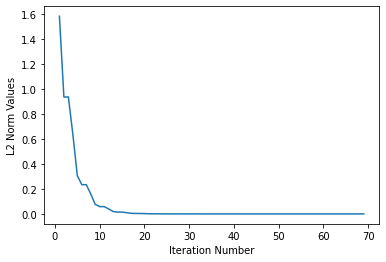

____________________________________Power Iteration Method - With Teleportation____________________________________
Number of iterations taken =  48
The page ranks are:  [3 1 4 2]


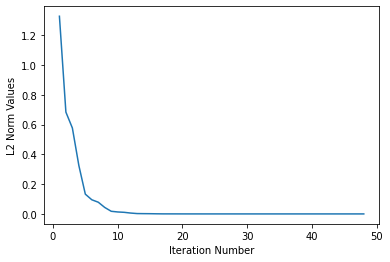

____________________________________Automatic Calculation - Without Teleportation____________________________________
The page ranks are:  [1 3 4 2]
____________________________________Automatic Calculation - With Teleportation____________________________________
The page ranks are:  [3 1 4 2]


In [14]:
n = int(input("Enter number of nodes: ")) #Take input of number of nodes
e = int(input("Enter number of edges: ")) #Take input of number of edges

#Initialize adjacency matrix
adjacency_matrix = np.zeros((n,n), dtype=float)
for i in range(e):
  print("Enter edge number ", i, " :")
  #Take input of each directed edge
  a = int(input("Enter starting node of edge: "))
  b = int(input("Enter ending node of edge: "))
  adjacency_matrix[a-1, b-1] = 1

#Compute probability tranistion matrix - without teleportation. 
prob_matrix = trans_prob_calc(adjacency_matrix, n)


#Compute probability tranistion matrix - with teleportation.
teleport_matrix = teleport_prob_calc(adjacency_matrix, prob_matrix, n)

#prob_matrix = [[1/6, 2/3, 1/6], [5/12, 1/6, 5/12], [1/6, 2/3, 1/6]] #Sample Test Case
prob_matrix = np.array(prob_matrix)

#Power iteration Method 
print("____________________________________Power Iteration Method - Without Teleportation____________________________________")
i, x_t, l2_values, iteration_number = power_iteration(n, prob_matrix)
print("Number of iterations taken = ",i)
#print("Final Probability Vector = ", x_t)
#Compute Page Ranks from Prob Values. 
temp = -1*x_t #For descending order (argmax uses A.O)
page_ranks = (temp).argsort()[:n]
page_ranks = page_ranks+1 #+1 to avoid 0 based indexing while ranking
print("The page ranks are: ", page_ranks)
#Plot Graph for visualising the algo. 
plt.plot(iteration_number, l2_values)
plt.xlabel('Iteration Number')
plt.ylabel('L2 Norm Values')
plt.show() # function to show the plot

print("____________________________________Power Iteration Method - With Teleportation____________________________________")
i, x_t, l2_values, iteration_number = power_iteration(n, teleport_matrix)
print("Number of iterations taken = ",i)
#print("Final Probability Vector = ", x_t)
#Compute Page Ranks from Prob Values. 
temp = -1*x_t #For descending order (argmax uses A.O)
page_ranks = (temp).argsort()[:n]
page_ranks = page_ranks+1 #+1 to avoid 0 based indexing while ranking
print("The page ranks are: ", page_ranks)
#Plot Graph for visualising the algo. 
plt.plot(iteration_number, l2_values)
plt.xlabel('Iteration Number')
plt.ylabel('L2 Norm Values')
plt.show() # function to show the plot

#Computation using Linear Algebra Package
print("____________________________________Automatic Calculation - Without Teleportation____________________________________")
left_vec = package_computation(n, prob_matrix)
#print("Final Probability Vector = ", left_vec)
#Compute Page Ranks from Prob Values. 
temp = -1*left_vec #For descending order (argmax uses A.O)
page_ranks = (temp).argsort()[:n]
page_ranks = page_ranks+1 #+1 to avoid 0 based indexing while ranking
print("The page ranks are: ", page_ranks)

print("____________________________________Automatic Calculation - With Teleportation____________________________________")
left_vec = package_computation(n, teleport_matrix)
#print("Final Probability Vector = ", left_vec)
#Compute Page Ranks from Prob Values. 1
temp = -1*left_vec #For descending order (argmax uses A.O)
page_ranks = (temp).argsort()[:n]
page_ranks = page_ranks+1 #+1 to avoid 0 based indexing while ranking
print("The page ranks are: ", page_ranks)

#Run Time Graphs

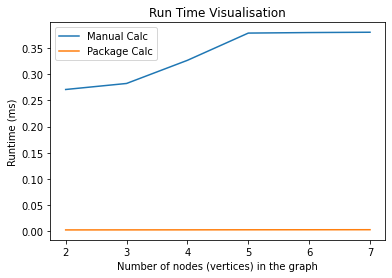

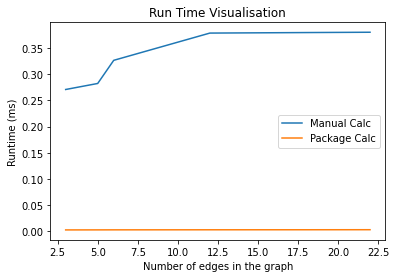

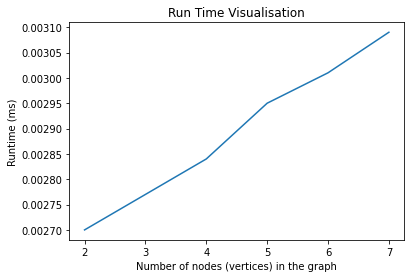

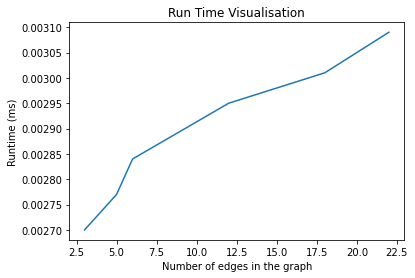

This shows that the package takes negligibly smaller time as compared to manual calculations and the runtime doesnt increase rapidly.


In [13]:
#Test cases were attempted for graphs with 2-7 edges
runtimes_manual = [0.2708, 0.2823, 0.32649, 0.3785, 0.3795, 0.3801]
runtimes_auto = [0.0027, 0.00277, 0.00284, 0.00295, 0.00301, 0.00309]
nodes = [2, 3, 4, 5, 6, 7] 
edges = [3, 5, 6, 12, 18, 22]

# plot lines
plt.plot(nodes, runtimes_manual, label = "Manual Calc")
plt.plot(nodes, runtimes_auto, label = "Package Calc")
plt.xlabel("Number of nodes (vertices) in the graph")  # add X-axis label
plt.ylabel("Runtime (ms)")  # add Y-axis label
plt.title("Run Time Visualisation")  # add title
plt.legend()
plt.show()


plt.plot(edges, runtimes_manual, label = "Manual Calc")
plt.plot(edges, runtimes_auto, label = "Package Calc")
plt.xlabel("Number of edges in the graph")  # add X-axis label
plt.ylabel("Runtime (ms)")  # add Y-axis label
plt.title("Run Time Visualisation")  # add title
plt.legend()
plt.show()


plt.plot(nodes, runtimes_auto, label = "Package Calc")
plt.xlabel("Number of nodes (vertices) in the graph")  # add X-axis label
plt.ylabel("Runtime (ms)")  # add Y-axis label
plt.title("Run Time Visualisation")  # add title
plt.show()
plt.plot(edges, runtimes_auto, label = "Package Calc")
plt.xlabel("Number of edges in the graph")  # add X-axis label
plt.ylabel("Runtime (ms)")  # add Y-axis label
plt.title("Run Time Visualisation")  # add title
plt.show()
print("This shows that the package takes negligibly smaller time as compared to manual calculations and the runtime doesnt increase rapidly.")